💻💻Aluno: Rodrigo de Oliveira Rodrigues💻💻 💻💻Disciplina: Bootcamp💻💻**

Prática online prévia - prorrogada para 22/11/2024 às 23h59 (Horário de Brasília)
Com base no arquivo CSV, realize a análise dos dados, gerando um relatório em PDF com o seu nome e as seguintes informações sobre o arquivo:

Quais atributos METAS foram identificados;
Quais atributos FEATURES foram identificados;
Quais atributos TARGETS foram identificados;
Qual o % de dados faltando; e,
Quais INSIGHTS foram obtidos com a EDA.

In [8]:
#**💻💻Aluno: Rodrigo de Oliveira Rodrigues💻💻**
#**💻💻Disciplina: Bootcamp**💻💻**
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
file_path = ("https://drive.google.com/uc?id=19DC0IHN5ggt1hWAaiby1pIni9LS_AobM")
df = pd.read_csv(file_path, sep=';')
##df.head(20)


In [5]:
# Estatísticas descritivas básicas
print("Estatísticas descritivas:")
print(df.describe(include='all'))

Estatísticas descritivas:
             ORDEM      VENDA_ID  VENDA_DATA   VENDA_ANO    VENDA_MES  \
count   2823.00000   2823.000000        2823  2823.00000  2823.000000   
unique         NaN           NaN         252         NaN          NaN   
top            NaN           NaN  11/14/2003         NaN          NaN   
freq           NaN           NaN          38         NaN          NaN   
mean    1412.00000  10258.725115         NaN  2003.81509     7.092455   
std      815.07423     92.085478         NaN     0.69967     3.656633   
min        1.00000  10100.000000         NaN  2003.00000     1.000000   
25%      706.50000  10180.000000         NaN  2003.00000     4.000000   
50%     1412.00000  10262.000000         NaN  2004.00000     8.000000   
75%     2117.50000  10333.500000         NaN  2004.00000    11.000000   
max     2823.00000  10425.000000         NaN  2005.00000    12.000000   

       VENDA_STATUS VENDA_TAMANHO  VENDA_PEDIDO   VENDA_ITEM   VENDA_QTDE  \
count          2823 

In [9]:
# Calculando o percentual de dados faltantes em cada coluna
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]  # Apenas colunas com dados faltantes
missing_percentage.sort_values(ascending=False)


,0
CLIENTE_COMPLEMENTO,89.302161
CLIENTE_ESTADO,52.639036
CLIENTE_CODIGO,2.692171


In [6]:
# Verificar os tipos de dados das colunas
print("\nTipos de dados das colunas:")
print(df.dtypes)


Tipos de dados das colunas:
ORDEM                    int64
VENDA_ID                 int64
VENDA_DATA              object
VENDA_ANO                int64
VENDA_MES                int64
VENDA_STATUS            object
VENDA_TAMANHO           object
VENDA_PEDIDO             int64
VENDA_ITEM               int64
VENDA_QTDE               int64
VENDA_TOTAL            float64
PRECO_UNITARIO         float64
PRECO_SUGERIDO           int64
PRODUTO_CODIGO          object
PRODUTO_LINHA           object
CLIENTE_CODIGO          object
CLIENTE_NOME            object
CLIENTE_FONE            object
CLIENTE_ENDERECO        object
CLIENTE_COMPLEMENTO     object
CLIENTE_CIDADE          object
CLIENTE_ESTADO          object
CLIENTE_PAIS            object
CLIENTE_TERRITORIO      object
CONTATO_NOME            object
CONTATO_SOBRENOME       object
dtype: object


In [16]:
# Selecionar apenas colunas numéricas para a correlação
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Verificar as primeiras linhas das colunas numéricas
print("\nColunas numéricas:")
print(numerical_df.head())

# Matriz de correlação para variáveis numéricas
correlations = numerical_df.corr()
print("\nCorrelação entre as variáveis numéricas:")
print(correlations)




Colunas numéricas:
   ORDEM  VENDA_ID  VENDA_ANO  VENDA_MES  VENDA_PEDIDO  VENDA_ITEM  \
0      1     10107       2003          2             1           2   
1      2     10121       2003          5             2           5   
2      3     10134       2003          7             3           2   
3      4     10145       2003          8             3           6   
4      5     10159       2003         10             4          14   

   VENDA_QTDE  VENDA_TOTAL  PRECO_UNITARIO  PRECO_SUGERIDO  
0          30      2871.00           95.70              95  
1          34      2765.90           81.35              95  
2          41      3884.34           94.74              95  
3          45      3746.70           83.26              95  
4          49      5205.27          100.00              95  

Correlação entre as variáveis numéricas:
                   ORDEM  VENDA_ID  VENDA_ANO  VENDA_MES  VENDA_PEDIDO  \
ORDEM           1.000000  0.016125   0.019375  -0.002831     -0.006619   
VEN

Com base nas primeiras linhas do arquivo e nos dados faltantes, podemos obter alguns insights iniciais:

Localização do Cliente: O alto percentual de dados faltantes em CLIENTE_ESTADO e CLIENTE_COMPLEMENTO pode indicar que essas informações são menos essenciais para o processamento de vendas ou podem não ser consistentemente fornecidas pelos clientes.

Distribuição Temporal das Vendas: As colunas VENDA_DATA, VENDA_ANO, e VENDA_MES podem ser usadas para analisar a sazonalidade e a variação nas vendas ao longo do tempo.

Segmentação Geográfica: A presença de CLIENTE_PAIS e CLIENTE_TERRITORIO permite uma análise por regiões e pode ajudar a identificar padrões de vendas em diferentes localidades.

In [11]:
df['VENDA_DATA'] = pd.to_datetime(df['VENDA_DATA'], errors='coerce')


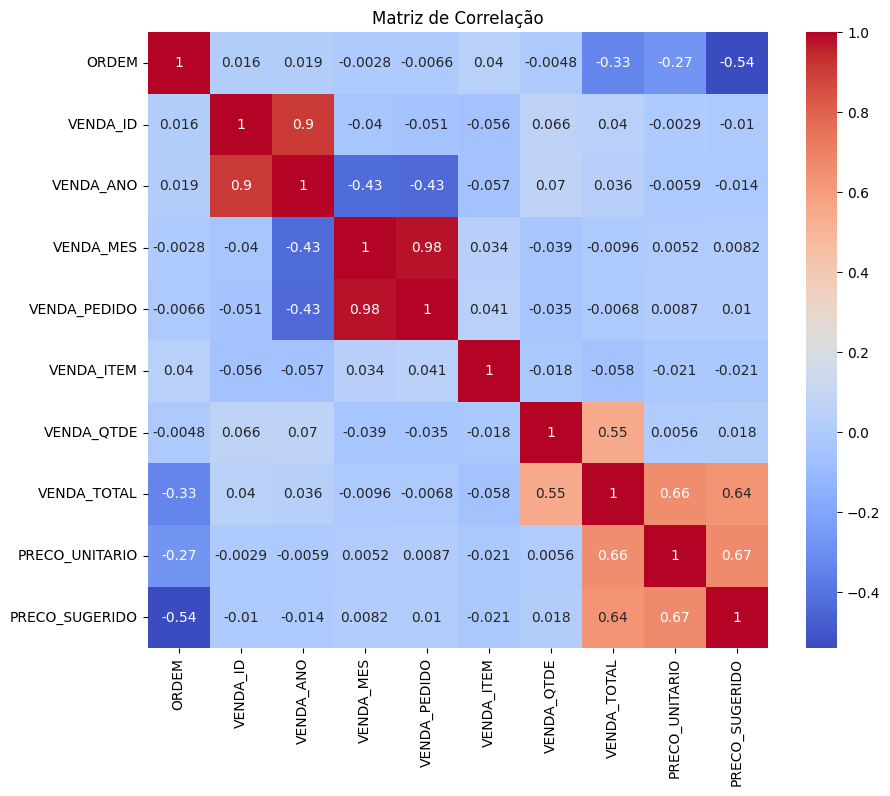

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas colunas numéricas para correlação
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

Análise Temporal das Vendas: Usando VENDA_ANO e VENDA_MES, você pode observar a tendência das vendas ao longo do tempo. Por exemplo, calcular a quantidade total de vendas por mês ou ano pode revelar padrões sazonais.

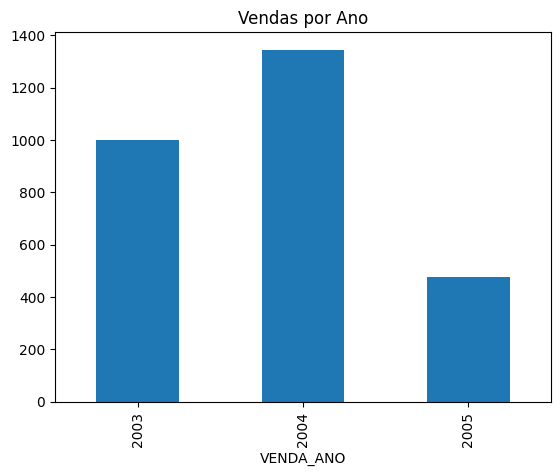

In [13]:
# Exemplo de vendas por ano
vendas_por_ano = df.groupby('VENDA_ANO').size()
vendas_por_ano.plot(kind='bar', title="Vendas por Ano")
plt.show()


Análise de Outliers e Distribuição de Dados: Use gráficos como boxplots para identificar outliers em variáveis de vendas, como VENDA_QTDE.

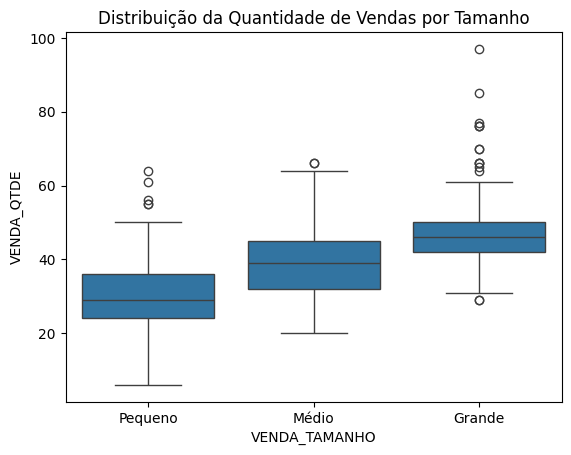

In [14]:
sns.boxplot(data=df, x='VENDA_TAMANHO', y='VENDA_QTDE')
plt.title("Distribuição da Quantidade de Vendas por Tamanho")
plt.show()


Análise de Segmentação por Região: Use CLIENTE_TERRITORIO ou CLIENTE_PAIS para ver se há diferença nas vendas entre regiões.

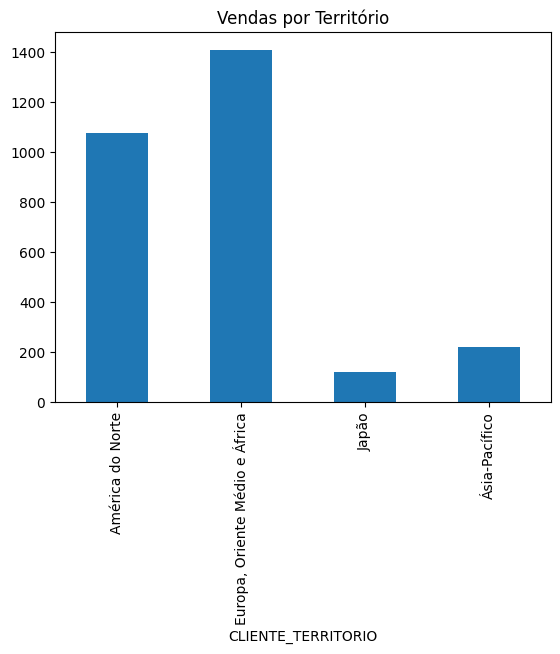

In [15]:
vendas_por_territorio = df.groupby('CLIENTE_TERRITORIO').size()
vendas_por_territorio.plot(kind='bar', title="Vendas por Território")
plt.show()
